In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#read both fashion-mnist_train and fashion-mnist_test dataset
train_fasion_dataset = pd.read_csv('dataset/fashion-mnist_train.csv')
test_fasion_dataset = pd.read_csv('dataset/fashion-mnist_test.csv')

In [3]:
#display fashion-mnist_train values
train_fasion_dataset.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [4]:
#display fashion-mnist_test values
test_fasion_dataset.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      0       0       0       0       0       0       0       0       9   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0      14      53   
3      2       0       0       0       0       0       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       8  ...       103        87        56         0         0         0   
1       0  ...        34         0         0         0         0         0   
2      99  ...         0         0         0         0        63        53   
3       0  ...       137       126       140         0       133       224   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2        31         0         0         0  
3       222        56         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [5]:
#pack train_fasion_dataset into train_data numpy array and covert them from integer to float
train_data = np.array(train_fasion_dataset, dtype = 'float32')

In [6]:
#pack test_fasion_dataset into train_data numpy array and covert them from integer to float 
test_data = np.array(test_fasion_dataset, dtype='float32')

In [7]:
#normalize values to range 0 to 1
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

In [8]:
#split x_train and y_train fashion dataset cordinates into x_train, x_validate, y_train and y_validate to ease training and testing of model
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

In [9]:
#this is for shaping images into 28X28 pixels
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 

In [10]:
#Reshape x_traing and x_test image paterns
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [11]:
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,Activation,Input
from keras.optimizers import Adam
from keras.models import Model
warnings.filterwarnings('ignore')

#deep learning model creation 
inputs = Input(shape = image_shape)#input state
#Hidden layers
layer = Conv2D(32,(3,3),activation = 'relu',padding = 'same')(inputs)
layer = MaxPooling2D()(layer)
layer = Conv2D(64, (3,3),activation = 'relu',padding = 'same')(layer)
layer = MaxPooling2D()(layer)
layer = Conv2D(128,(3,3),activation ='relu',padding = 'same')(layer)
layer = MaxPooling2D()(layer)
layer = Flatten()(layer)
layer = Dense(264,activation = 'relu')(layer)
#output with activation of softmax function
outputs = Dense(10,activation = 'softmax')(layer)

#initializing created model 
deepNeuralNetworkModel = Model(inputs,outputs)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [12]:
#compile model  for accurate detections and optimization
deepNeuralNetworkModel.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [13]:
#fit or train created model with explited x_train and y_train diabeties dataset and validate two datasets
history = deepNeuralNetworkModel.fit(x_train, y_train, epochs=2, validation_data=(x_validate,y_validate),)

Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpz7as6ksj.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpz7as6ksj.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1500/1500 [==============================] - 744s 432ms/step - loss: 0.6381 - accuracy: 0.7708 - val_loss: 0.3108 - val_accuracy: 0.8880
Epoch 2/2
1500/1500 [==============================] - 771s 514ms/step - loss: 0.2946 - accuracy: 0.8931 - val_loss: 0.2752 - val_accuracy: 0.9013


In [14]:
#evaluation of both training loss and accuracy
score = deepNeuralNetworkModel.evaluate(x_train,y_train,verbose=0)
#print testing loss and accuracy
print('Model Training Loss : {:.3f}'.format(score[0]))
print('Model Training Accuracy : {:.2f}%'.format(score[1]*100))

Model Training Loss : 0.246
Model Training Accuracy : 91.15%


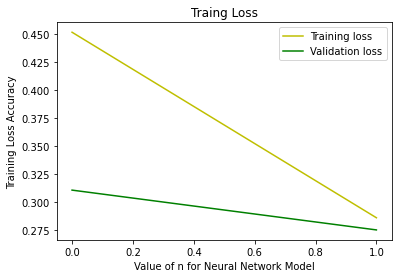

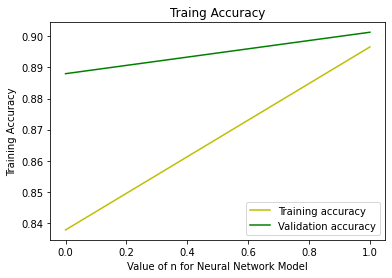

In [15]:
#Training graphs
plt.title("Traing Loss")
plt.plot(history.history['loss'], color='y', label="Training loss")
plt.plot(history.history['val_loss'], color='g', label="Validation loss")
plt.xlabel("Value of n for Neural Network Model")
plt.ylabel("Training Loss Accuracy")
plt.legend()
plt.show()

plt.figure()

plt.title("Traing Accuracy")
plt.plot(history.history['accuracy'], color='y', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='g',label="Validation accuracy")
plt.xlabel("Value of n for Neural Network Model")
plt.ylabel("Training Accuracy")
plt.legend()
plt.show()


In [16]:
#fit or train created model with explited x_test and y_test diabeties dataset and validate two datasets 
history = deepNeuralNetworkModel.fit(x_test, y_test, epochs=2, validation_data=(x_validate,y_validate),)

Epoch 1/2
313/313 [==============================] - 160s 502ms/step - loss: 0.2611 - accuracy: 0.9028 - val_loss: 0.2512 - val_accuracy: 0.9087
Epoch 2/2
313/313 [==============================] - 143s 456ms/step - loss: 0.2126 - accuracy: 0.9190 - val_loss: 0.2473 - val_accuracy: 0.9074


In [17]:
#evaluation of both testing loss and accuracy
score1 = deepNeuralNetworkModel.evaluate(x_test,y_test,verbose=0)
#print testing loss and accuracy
print('Test Loss : {:.3f}'.format(score1[0]))
print('Test Accuracy : {:.2f}%'.format(score1[1]*100))

Test Loss : 0.166
Test Accuracy : 94.17%


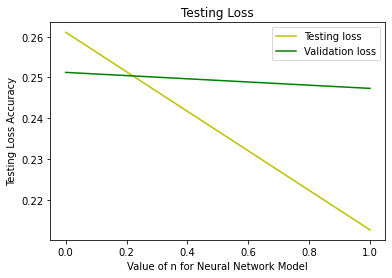

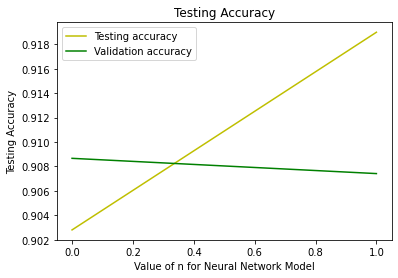

In [18]:
#Testing graphs
plt.title("Testing Loss")
plt.plot(history.history['loss'], color='y', label="Testing loss")
plt.plot(history.history['val_loss'], color='g', label="Validation loss")
plt.xlabel("Value of n for Neural Network Model")
plt.ylabel("Testing Loss Accuracy")
plt.legend()
plt.show()

plt.figure()

plt.title("Testing Accuracy")
plt.plot(history.history['accuracy'], color='y', label="Testing accuracy")
plt.plot(history.history['val_accuracy'], color='g',label="Validation accuracy")
plt.xlabel("Value of n for Neural Network Model")
plt.ylabel("Testing Accuracy")
plt.legend()
plt.show()


In [ ]:
**********************************Report**********************************

Based on given training dataset and testing dataset, the model we created was able to validate those two datasets and gives
us an accuracy that is more than 80%, of which on the other hand we can consider the model to best. Due to that two dataset
validation we were able to come up with bo training and testing accuracy together with their losses as this could ease 
modification of a model to avoid more losses. Those graphs shows both testing and training accuracy and loss together with 
their accuracy validations and loss validations

In [ ]:
**********************Assignment done by**********************
Makoa Lerato
Molise Sekuruba
Rapaki Bokang